<a href="https://colab.research.google.com/github/Festuskipkoech/langgraph/blob/main/2_graph_with_condition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from typing import TypedDict, Literal

class PortfolioState(TypedDict):
  amount_usd: float
  total_usd: float
  target_currency: Literal['KSH', 'EUR']
  total: float

In [4]:
def calc_total(state: PortfolioState) -> PortfolioState:
  state['total_usd'] = state['amount_usd'] * 1.08
  return state
def convert_to_ksh(state: PortfolioState) -> PortfolioState:
  state['total'] = state['total_usd'] * 130
  return state
def convert_to_eur(state: PortfolioState) -> PortfolioState:
  state['total'] = state['total_usd'] * 0.9
  return state
def chose_conversion_state(state: PortfolioState) -> str:
  return state['target_currency']

In [8]:
!pip install -U langgraph

In [11]:
from langgraph.graph import StateGraph, START, END
builder = StateGraph(PortfolioState)

builder.add_node('calc_total_node', calc_total)
builder.add_node('convert_to_ksh_node', convert_to_ksh)
builder.add_node('convert_to_eur_node', convert_to_eur)

builder.add_edge(START, 'calc_total_node')
builder.add_conditional_edges(
    'calc_total_node',
    chose_conversion_state,
    {
        "KSH": "convert_to_ksh_node",
        "EUR":"convert_to_eur_node"
    }
)
builder.add_edge(['convert_to_ksh_node','convert_to_eur_node'], END)

graph = builder.compile()

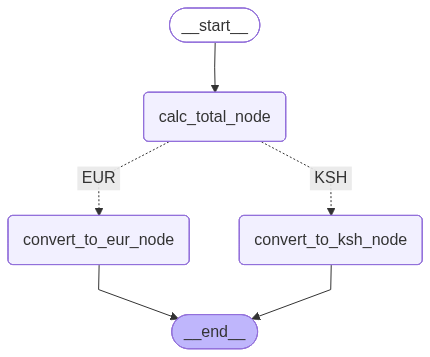

In [14]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [21]:
graph.invoke({'amount_usd': 20000, "target_currency": 'KSH'})

{'amount_usd': 20000,
 'total_usd': 21600.0,
 'target_currency': 'KSH',
 'total': 2808000.0}